# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a training set and a test set of images of plant seedlings at various stages of grown. 
- Each image has a filename that is its unique id. 
- The dataset comprises 12 plant species.
- The goal is to create a classifier capable of determining a plant's species from a photo.



In [ ]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
train_path = "/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip"

In [ ]:
# Make different folders for train and test data in the current directory of Google Colab notebook. (using mkdir)
!mkdir temp_train

mkdir: cannot create directory ‘temp_train’: File exists
mkdir: cannot create directory ‘temp_test’: File exists


# Unziping train file:

In [ ]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [ ]:
path = "./temp_train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [ ]:
print(trainImg.shape)
print(trainLabel.shape)

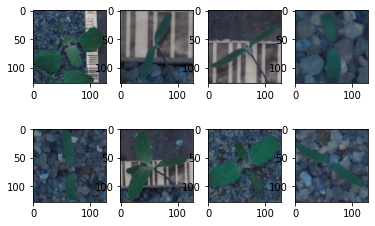

In [ ]:
# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

# Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

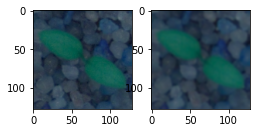

In [ ]:
preprocessed_train = []       # Initialize empty list to store the images after pre-processing.

for img in trainImg:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_train.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_train = np.asarray(preprocessed_train)    # Convert to numpy array.

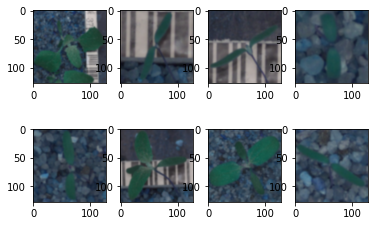

In [ ]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_train[i])

In [ ]:
# Normalize image data.
preprocessed_train = preprocessed_train / 255

# Make data compatible:


In [ ]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(trainLabel)

In [ ]:
y[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_train, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [ ]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [ ]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [ ]:
print(X_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


# Building CNN:


In [ ]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size, 128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [ ]:
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set epochs = 30, and fit the model.
model.fit(X_train, y_train, epochs = 40, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/40
104/104 [==============================] - 13s 130ms/step - loss: 2.4401 - accuracy: 0.1350 - val_loss: 2.4388 - val_accuracy: 0.1262
Epoch 2/40
104/104 [==============================] - 12s 115ms/step - loss: 2.4240 - accuracy: 0.1275 - val_loss: 2.4350 - val_accuracy: 0.1262
Epoch 3/40
104/104 [==============================] - 12s 115ms/step - loss: 2.4225 - accuracy: 0.1386 - val_loss: 2.4328 - val_accuracy: 0.1262
Epoch 4/40
104/104 [==============================] - 12s 115ms/step - loss: 2.4213 - accuracy: 0.1338 - val_loss: 2.4278 - val_accuracy: 0.1262
Epoch 5/40
104/104 [==============================] - 12s 114ms/step - loss: 2.3473 - accuracy: 0.1910 - val_loss: 2.1913 - val_accuracy: 0.2511
Epoch 6/40
104/104 [==============================] - 12s 113ms/step - loss: 2.0118 - accuracy: 0.2971 - val_loss: 2.0130 - val_accuracy: 0.2482
Epoch 7/40
104/104 [==============================] - 12s 113ms/step - loss: 1.9057 - accuracy: 0.3065 - val_loss: 1.9094 - val_ac

In [ ]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5420226454734802
Test accuracy: 0.8103932738304138


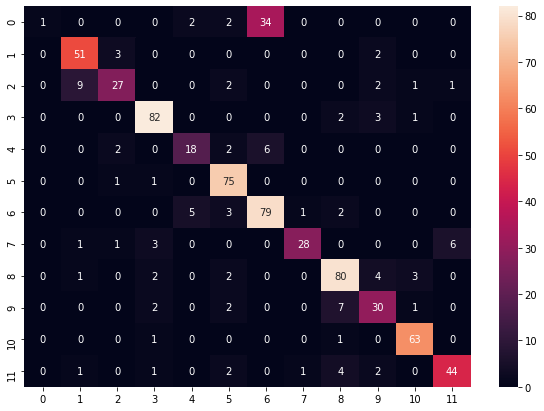

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

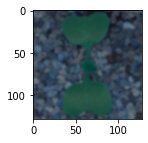

Predicted Label 1
True Label 1


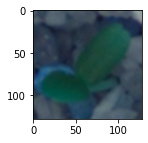

Predicted Label 10
True Label 2


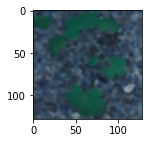

Predicted Label 10
True Label 10


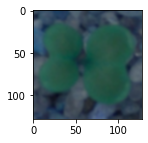

Predicted Label 1
True Label 1


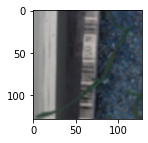

Predicted Label 6
True Label 4


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))